1. Etapa de Importação de banco de dados e tratamento inicial dos dados

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train_data = train_data[train_data['Embarked'].notna()]

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [16]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

train_data.describe()

C:\Users\patrick.vieira\AppData\Local\Temp\ipykernel_11240\378154012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())


,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


2. Etapa de verificação de correlacionamento das variáveis

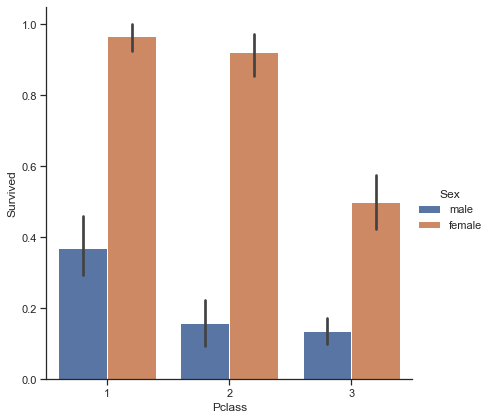

In [64]:
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="Pclass", y="Survived",hue='Sex', data=train_data, kind="bar", height=6, aspect=1)

<AxesSubplot:xlabel='Survived', ylabel='Count'>

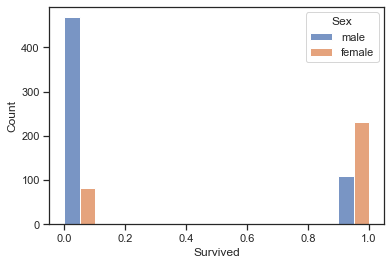

In [50]:
sns.histplot(x="Survived", data=train_data, bins=10, hue='Sex', element='bars', multiple='dodge')

<AxesSubplot:xlabel='Age', ylabel='Count'>

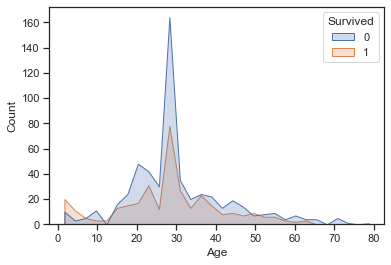

In [51]:
sns.histplot(x='Age', data=train_data, hue='Survived', element='poly')

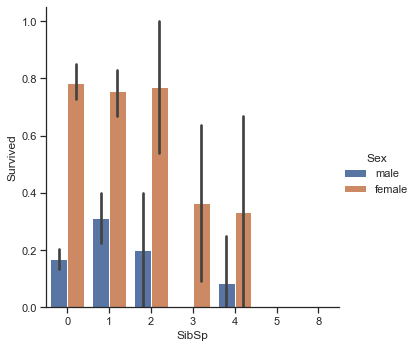

In [63]:
sns.catplot(x="SibSp", y="Survived",hue='Sex', data=train_data, kind="bar", height=5, aspect=1)

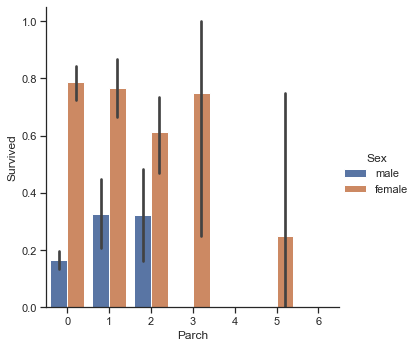

In [67]:
sns.catplot(x="Parch", y="Survived",hue='Sex', data=train_data, kind="bar", height=5, aspect=1)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

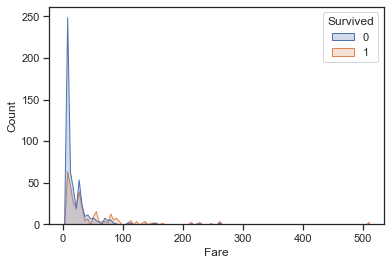

In [66]:
sns.histplot(x='Fare', data=train_data, hue='Survived', element='poly')

<AxesSubplot:xlabel='Sex,Survived'>

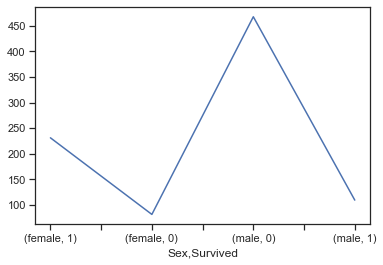

In [89]:
train_data.groupby('Sex')['Survived'].value_counts().plot()